1\. Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [ ]:
#Da migliorareee
import math

#binario->decimale:
def bindec(num):
    x= [int(x) for x in num]
    x.reverse()
    w = 0
    dec = 0
    for i in range(len(x)-1):
        w += x[i]*(2**i)

    dec = w * (-1)**(x[len(x)-1])
    return dec

#decimale->binario: 
def decbin(w, x):
    if x==0:
        w = [0]
        return w
    else:
        if x//2 == 0:
            w.append(1)
            return w
        else:
            a = x%2
            w.append(a)
            return decbin(w, x//2)

#esadecimale->decimale:
def hexdec(num):
    x= [int(x) for x in num]
    x.reverse()
    w = 0
    dec = 0
    for i in range(len(x)-1):
        w += x[i]*(16**i)

    dec = w * (-1)**(x[len(x)-1])
    return dec

#decimale->esadecimale:
def dechex(w, x):
    if x==0:
        w = [0]
        return w
    else:
        if x//16 == 0:
            w.append(x)
            return w
        else:
            a = x%16
            w.append(a)
            return dechex(w, x//16)

num = input("Which number do you want to start from? ")
repr_in = input("Which representation did you use? (write 'dec', 'bin' or 'hex') ")
repr_fin = input("In which representation do you want it? (write 'dec', 'bin' or 'hex') ")

if repr_in == "dec":
    n = []
    if repr_fin == "bin":
        b = decbin(n, int(num))
        b.reverse()
        print(b)
    elif repr_fin == "hex":
        b = dechex(n, int(num))
        b.reverse()
        print(b)
    else:
        print("Conversione impossibile")

elif repr_in == "bin":
    if repr_fin == "dec":
        b = bindec(num)
        print(b)
    elif repr_fin == "hex":
        b = bindec(num)
        n = []
        c = dechex(n,b)
        c.reverse()
        print(c)
    else:
        print("Conversione impossibile")

elif repr_in == "hex":
    if repr_fin == "dec":
        b = hexdec(num)
        print(b)
    elif repr_fin == "bin":
        b = hexdec(num)
        n = []
        c = decbin(n, b)
        c.reverse()
        print(c)
    else:
        print("Conversione impossibile")

else:
    print("Conversione impossibile")

           


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [24]:
import math

#binario->decimale:
def bindec(num):
    x= [int(x) for x in num]
    x.reverse()
    exp = 0
    dec = 0
    mant = 0
    bias = 127
    sign = x[-1]
    e = x[-9 : -1]
    m = x[0 : 23]
    for i in range(8):
        exp += e[i]*(2**i)
    for j in range(23):
        mant += m[j]*2**(- 23 + j) 
        mantt = mant + 1
        
    dec = mantt * (-1) ** (sign) * 2 ** (exp - bias)
    print(e)
    print(m)
    print(sign)
    print(exp)
    print(mantt)
    print(dec)

a = input("Set a 32-bit number: ")
b = bindec(a)

Set a 32-bit number:  11000000101100000000000000000000


[1, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
1
129
1.375
-5.5


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [1]:
import math

def find_overflow():
    x = 1
    while True:
        prev = x
        x = x*2.0
        if x == float('inf'):
            return(prev)

def find_underflow():
    x = 1
    while True:
        prev = x
        x = x/2.0
        if x == 0.0:
            return(prev)

overflow_limit = find_overflow()
underflow_limit = find_underflow()

print("Limite di over flow: ", overflow_limit)
print("Limite di under flow: ", underflow_limit)


Limite di over flow:  8.98846567431158e+307
Limite di under flow:  5e-324


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [15]:
import math

def find_precision():
    x = 1.0
    for i in range(1, 20):
        y = x + 10**(-i)
        if y == x:
            return(10**(-i+1))

b = find_precision()
print("La precisione è: ", b)

La precisione è:  1e-15


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [4]:
import math

def a_solve_equation(a,b,c):
    x_1 = ((- b + math.sqrt(b**2-4*a*c)) / (2*a))
    x_2 = ((- b - math.sqrt(b**2-4*a*c)) / (2*a))
    print("a) ", x_1, ", ", x_2)
    return(x_1, x_2)

def b_solve_equation(a,b,c):
    x_1 = -2*c/(b+math.sqrt(b**2-4*a*c))
    x_2 = -2*c/(b-math.sqrt(b**2-4*a*c))
    print("b) ", x_1, ", ", x_2)
    return(x_1, x_2)

a = 0.001
b = 1000
c = 0.001

ris_a = a_solve_equation(a,b,c)
ris_b = b_solve_equation(a,b,c)


a)  -9.999894245993346e-07 ,  -999999.999999
b)  -1.000000000001e-06 ,  -1000010.5755125057


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

Analytical derivative of f(x)=x(x-1) in x = 1:  1.0
Derivative of f(x)=x(x-1) with d =  0.01 :  1.010000000000001 Error:  0.010000000000000897
Derivative of f(x)=x(x-1) with d =  0.0001 :  1.0000999999998899 Error:  9.999999988985486e-05
Derivative of f(x)=x(x-1) with d =  1e-06 :  1.0000009999177333 Error:  9.99917733279787e-07
Derivative of f(x)=x(x-1) with d =  1e-08 :  1.0000000039225287 Error:  3.922528746258536e-09
Derivative of f(x)=x(x-1) with d =  1e-10 :  1.000000082840371 Error:  8.284037100736441e-08
Derivative of f(x)=x(x-1) with d =  1e-12 :  1.0000889005833413 Error:  8.890058334132256e-05
Derivative of f(x)=x(x-1) with d =  1e-14 :  0.9992007221626509 Error:  0.0007992778373491216
Derivative of f(x)=x(x-1) with d =  1e-16 :  0.0 Error:  1.0
[0.01, 0.0001, 1e-06, 1e-08, 1e-10, 1e-12, 1e-14, 1e-16]
[0.010000000000000897, 9.999999988985486e-05, 9.99917733279787e-07, 3.922528746258536e-09, 8.284037100736441e-08, 8.890058334132256e-05, 0.0007992778373491216, 1.0]


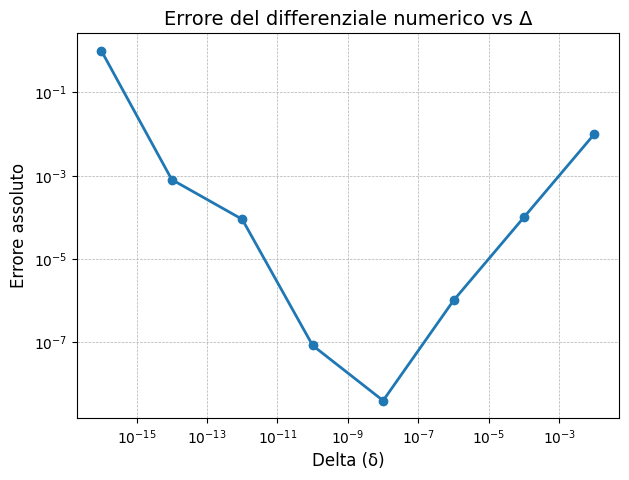

In [36]:
import numpy as np
import math
import matplotlib.pyplot as plt

def f(m):
    return(m*(m-1))

def derivative(m, delta):
    df = (f(m+delta) - f(m))/delta
    return(df)

x = 1.0
true_der = 2*x-1
print ("Analytical derivative of f(x)=x(x-1) in x = 1: ", true_der)

deltas = [10**(-i) for i in range(2, 17, 2)]
error = []

for d in deltas:
    x = 1.0
    errors = abs(derivative(x,d)-true_der)
    error.append(errors)
    print ("Derivative of f(x)=x(x-1) with d = ", d ,": ", derivative(x,d), "Error: ", errors)
print(deltas)
print(error)
plt.figure(figsize=(7,5))
plt.loglog(deltas, error, 'o-', linewidth=2, markersize=6)
plt.xlabel("Delta (δ)", fontsize=12)
plt.ylabel("Errore assoluto", fontsize=12)
plt.title("Errore del differenziale numerico vs Δ", fontsize=14)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()





7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [47]:
import math
import numpy as np

def f(x):
    return(math.sqrt(1-x**2))
    
def integ(N):
    I = 0
    for x in np.linspace(-1, +1, N):
        I += (2/N)*f(x)
    return(I)

M = 100
print(integ(M))
    

1.5534179294048955
